# <center>Laboratorium 11<br>Metody Numeryczne</center>

In [164]:
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.integrate as ig
from scipy import special

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z metodami całkowania numerycznego funkcji:  
$$
\int\limits_{a}^{b}f(x)dx 
$$  

Dana jest funkcja $f(x)$, należy wyznaczyć wartość całki tej funkcji na przedziale $a$,$b$.


***Zadanie 1.***    
Wyznacz numerycznie wartość całki:   
$$
\int\limits_{a}^{b}\log(1+\tan(x))dx 
$$

Wykonaj następujące czynności:

1. Czy możliwe jest całkowanie podanej funkcji na dowolnym przedziale? Swoją odpowiedź uzasadnij.
2. Oblicz całkę numerycznie na przedziale $a =0$, $b=\cfrac{\pi}{4}$ przy pomocy następujących metod:  
    1. Metoda Trapezów - [trapz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapz.html#scipy.integrate.trapz)
    2. Metoda Simpsona - [simps](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html#scipy.integrate.simps) 
    3. Metoda Romberga - [romb](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romb.html#scipy.integrate.romb)  
  
Sprawdź jak wyniki róźnią się od siebie, czy ma na nie wpływ długość wektora $\mathbf{y}$ oraz wartość parametru $dx$

3. Porównaj wyniki i czas obliczeń z punktu 1 z funkcjami:
    1. [quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy-integrate-quad)
    2. [romberg](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html#scipy.integrate.romberg)
    3. [quadrature](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quadrature.html#scipy.integrate.quadrature)

Aby możliwe było numeryczne zcałkowanie funkcji na danym przedziale ważne jest aby była ona tam określona, ograniczona i ciągła. W przypadku gdy funkcja jest nieokreślona w pewnym punkcie całkowania, algorytm może zwrócić błąd z uwagi na napotkany niedozwolony argument. Z kolei gdy całka w dobranym przedziale zmierza do nieskończoności, wyniki otrzymane przez funkcję będą duże i nieprawdziwe.
Daną funkcję $log(1+\tan(x))$ można więc zcałkować na podanym przedziale $a,b$ ponieważ spełnia ona w nim wszystkie wymienione powyżej założenia.

***Wykresy obliczonej całki w zależności od długości wektora y, x i wartości parametru dx:***

In [165]:
f = lambda x: np.log(1 + np.tan(x))
len_of_y = np.arange(1,16386,1)
k = np.arange(0,15,1)
integral_for_different_dx_trapz = []
integral_for_different_dx_trapz_with_x_vec =[]
integral_for_different_dx_simps = []
integral_for_different_dx_simps_with_x_vec =[]
integral_for_different_dx_romb = []
for length in len_of_y:
    x = np.linspace(0,np.pi/4,length)
    y = f(x)
    integral_for_different_dx_trapz.append(ig.trapz(y,dx=np.pi/(4*length)))
    integral_for_different_dx_trapz_with_x_vec.append(ig.trapz(y,x))
    integral_for_different_dx_simps.append(ig.simps(y,dx=np.pi/(4*length)))
    integral_for_different_dx_simps_with_x_vec.append(ig.simps(y,x))
for k_it in k:
    y = f(np.linspace(0,np.pi/4,(2**k_it)+1))
    integral_for_different_dx_romb.append(ig.romb(y,dx=np.pi/(4*(2**k_it+1))))

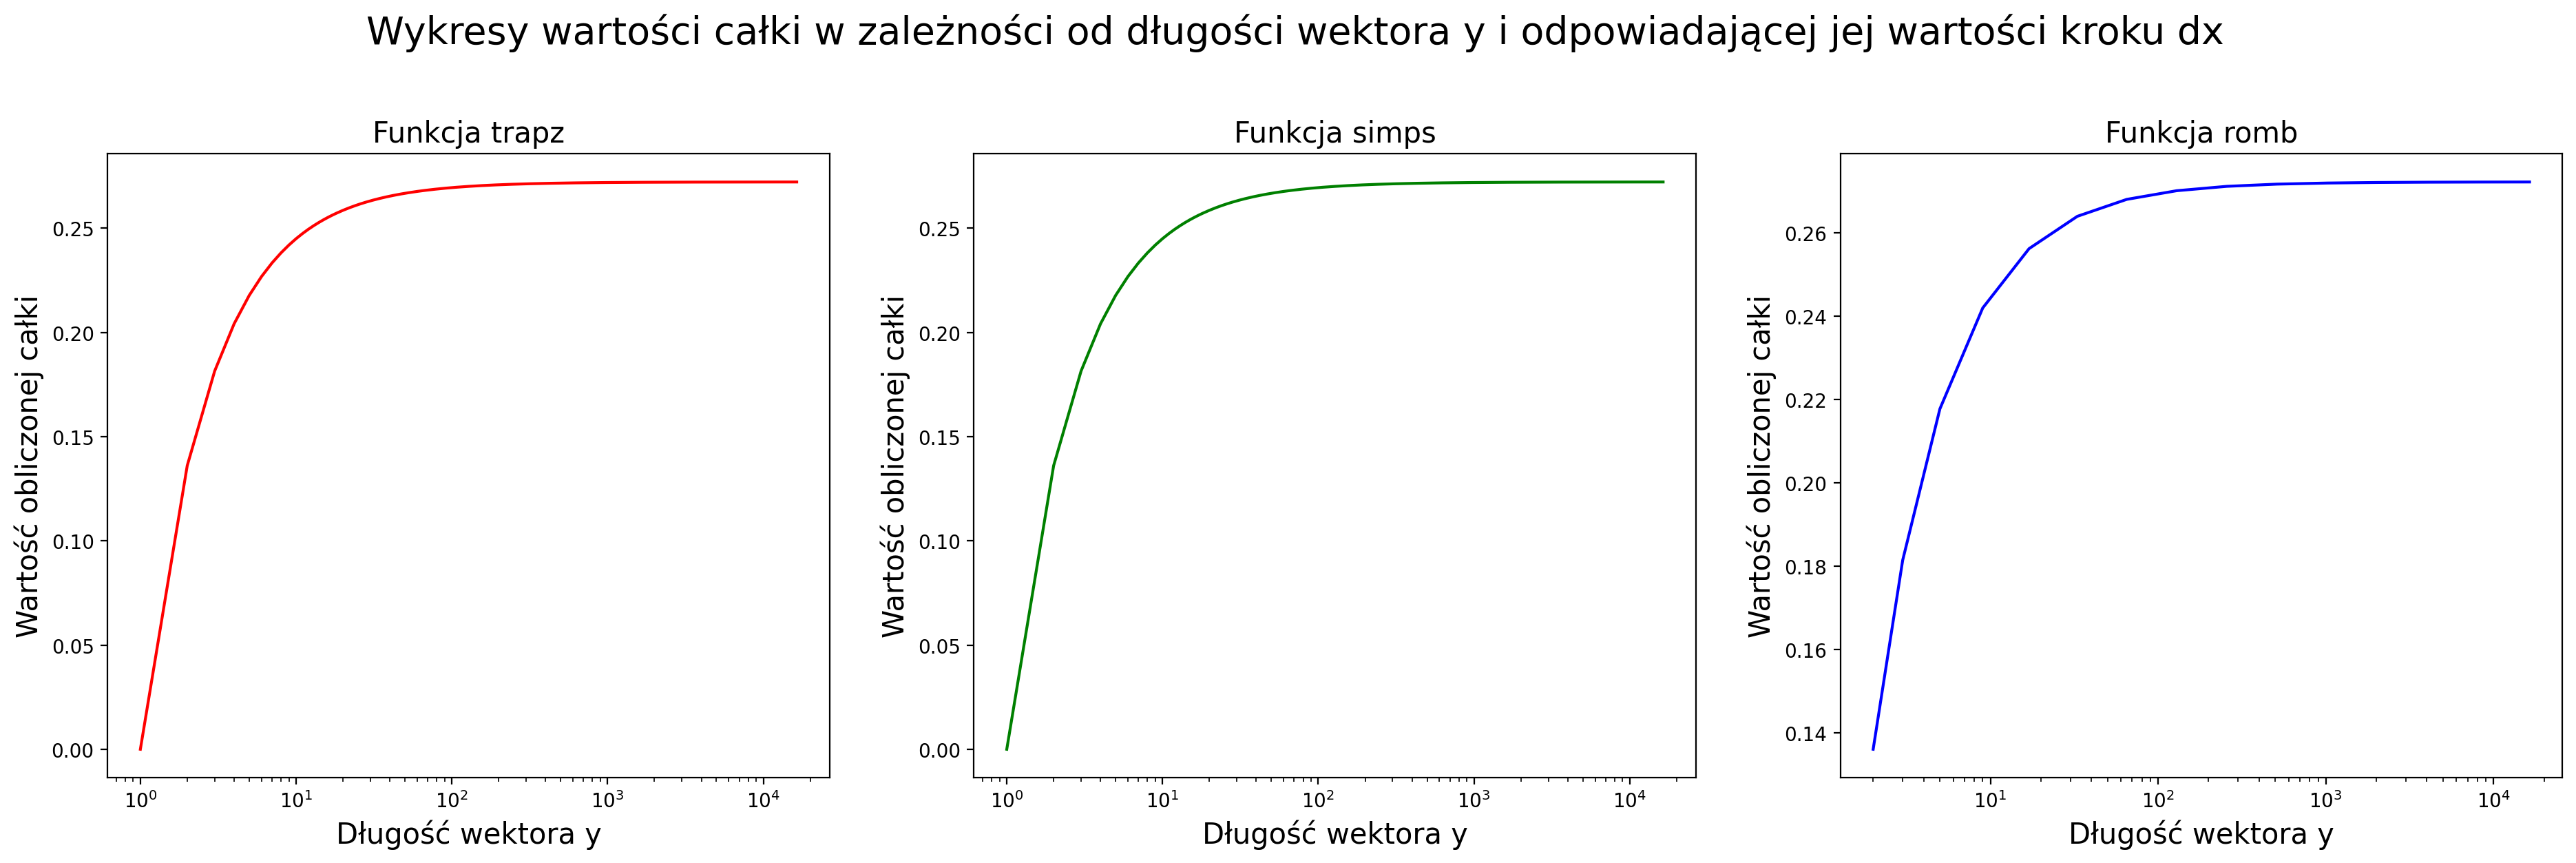

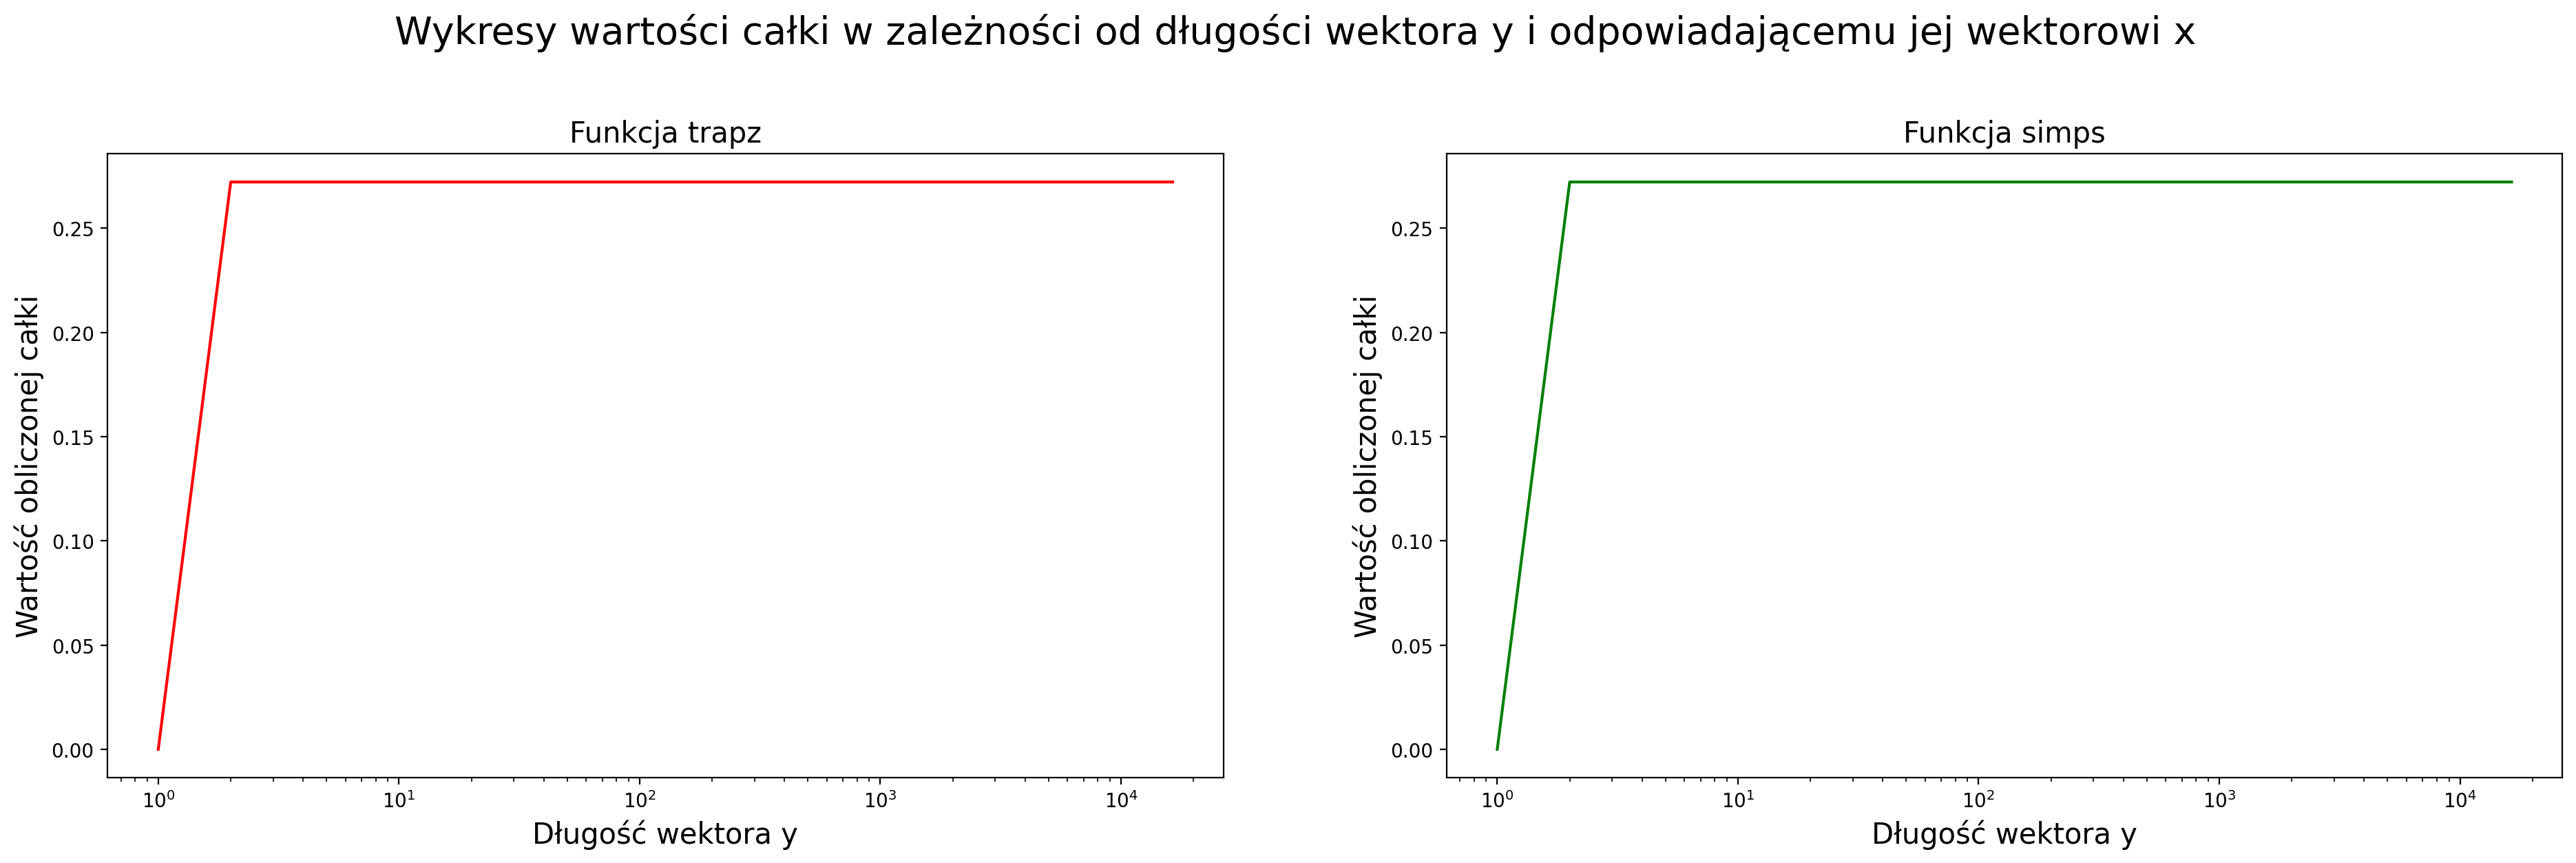

In [166]:
fig, ax = plt.subplots(1,3,figsize=(23,6),dpi=200)
fig.suptitle('Wykresy wartości całki w zależności od długości wektora y i odpowiadającej jej wartości kroku dx',fontsize=20,y=1.05)
ax[0].plot(len_of_y,integral_for_different_dx_trapz,color='red')
ax[0].set_xscale('log')
ax[0].set_title('Funkcja trapz',fontsize=15)
ax[0].set_xlabel('Długość wektora y',fontsize=15)
ax[0].set_ylabel('Wartość obliczonej całki',fontsize=15)
ax[1].plot(len_of_y,integral_for_different_dx_simps,color='green')
ax[1].set_xscale('log')
ax[1].set_title('Funkcja simps',fontsize=15)
ax[1].set_xlabel('Długość wektora y',fontsize=15)
ax[1].set_ylabel('Wartość obliczonej całki',fontsize=15)
ax[2].plot(2**k+1,integral_for_different_dx_romb,color='blue')
ax[2].set_xscale('log')
ax[2].set_title('Funkcja romb',fontsize=15)
ax[2].set_xlabel('Długość wektora y',fontsize=15)
ax[2].set_ylabel('Wartość obliczonej całki',fontsize=15)
plt.show()
fig, ax = plt.subplots(1,2,figsize=(23,6),dpi=200)
fig.suptitle('Wykresy wartości całki w zależności od długości wektora y i odpowiadającemu jej wektorowi x',fontsize=20,y=1.05)
ax[0].plot(len_of_y,integral_for_different_dx_trapz_with_x_vec,color='red')
ax[0].set_xscale('log')
ax[0].set_title('Funkcja trapz',fontsize=15)
ax[0].set_xlabel('Długość wektora y',fontsize=15)
ax[0].set_ylabel('Wartość obliczonej całki',fontsize=15)
ax[1].plot(len_of_y,integral_for_different_dx_simps_with_x_vec,color='green')
ax[1].set_xscale('log')
ax[1].set_title('Funkcja simps',fontsize=15)
ax[1].set_xlabel('Długość wektora y',fontsize=15)
ax[1].set_ylabel('Wartość obliczonej całki',fontsize=15)
plt.show()

Na pierwszym zestawie wykresów wyraźnie widać, jak długość wektora y ma wpływ na dokładność otrzymanego wyniku. Im dłuższy wektor wartości y tym lepiej przybliżone rozwiązanie zwraca algorytm. Parametr dx informuje funkcję o tym co jaką wartość na osi x były 'pobierane' kolejne próbki wartości funkcji f. Pozwala on na zachowanie właściwego 'przeskalowania' wyniku, a pozostawienie jego wartości na jeden spowodowałoby drastyczne zwiększanie wyniku w każdej iteracji. Wszystkie testowane powyżej algorytmy zmierzają do właściwego rozwiązania w bardzo podobnym tempie. Co ciekawe, gdy zamiast wartości kroku dx dla funkcji trapz oraz simps podamy wektor argumentów x, właściwe rozwiązanie otrzymujemy już dla bardzo krótkich wektorów. Może to być spowodowane kształtem funkcji f, przypominającym trójkąt.

***Porównanie błędu metod względem rozwiązania wyznaczonego w sposób analityczny przy pomocy programu WolframAlpha:***
Do metod przyjmujących za argumenty wektory przyjęto wektory o długości 16 385 elementów.

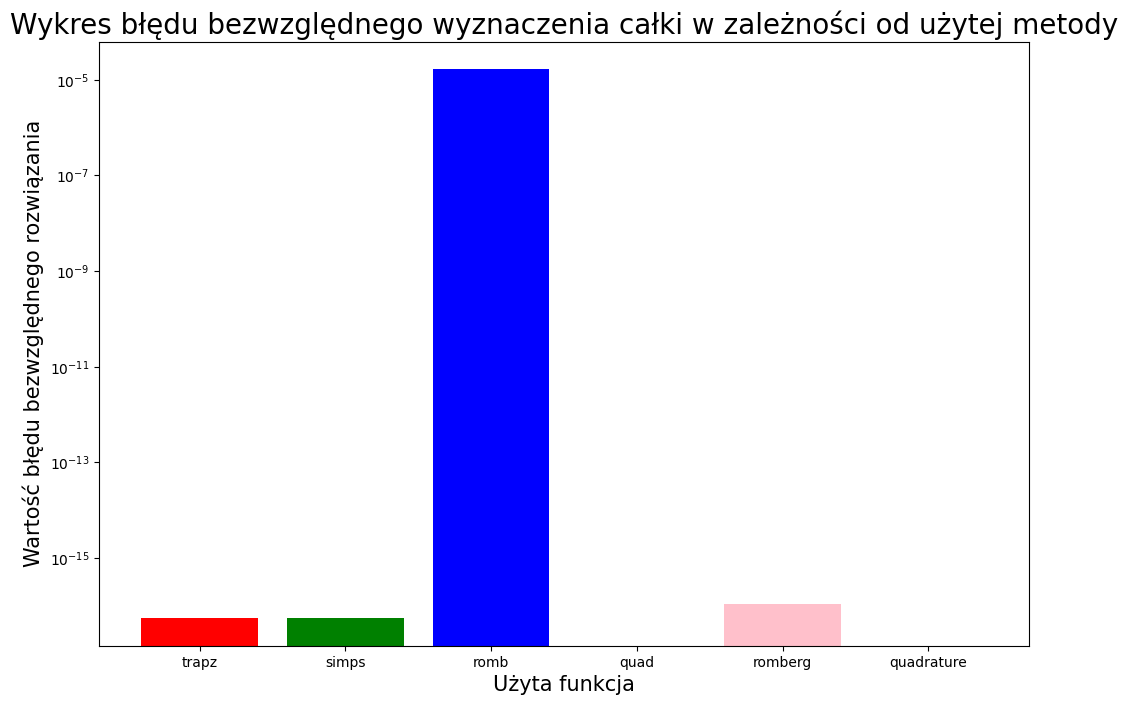

In [167]:
solution = np.pi*np.log(2)/8
x = np.linspace(0, np.pi/4, 2**14+1)
trapz = ig.trapz(f(x), x)
simps = ig.simps(f(x), x)
romb = ig.romb(f(x), dx=np.pi/(4*(2**14+1)))
quad, quad_err = ig.quad(f, 0, np.pi/4)
romberg = ig.romberg(f, 0, np.pi/4)
quadrature, q_err = ig.quadrature(f, 0, np.pi/4)
error_vector = [np.abs(solution-trapz), np.abs(solution-simps), np.abs(solution-romb), np.abs(solution-quad), np.abs(solution-romberg), np.abs(solution-quadrature)]
string_vector = ['trapz', 'simps', 'romb', 'quad', 'romberg', 'quadrature']
color_vector = ['red', 'green','blue','orange','pink','cyan']
plt.figure(figsize=(12,8),dpi=100)
plt.bar(string_vector,error_vector,color=color_vector)
plt.yscale('log')
plt.title('Wykres błędu bezwzględnego wyznaczenia całki w zależności od użytej metody',fontsize=20)
plt.xlabel('Użyta funkcja',fontsize=15)
plt.ylabel('Wartość błędu bezwzględnego rozwiązania',fontsize=15)
plt.show()

Ponownie można zauważyć, że funkcje trapz i simps, które wywołano z wektorem x-ów zwracają dużo mniejszy błąd niż funkcja romb, która została wywołana z wartościami kroku dx i poradziła sobie najgorzej. Wszystkie pięć pozostałych funkcji zwraca błąd na poziomie zera maszynowego. Najlepiej jednak działają w tym przypadku funkcje quad oraz quadrature, przyjmujące za argumenty nie wektory wartości a samą funkcję f, które wyznaczyły całkę całkowicie bezbłędnie.

***Porównanie czasu działania poszczególnych metod:***

In [168]:
%%capture
trapz_time = %timeit -o ig.trapz(f(x), x)
simps_time = %timeit -o ig.simps(f(x), x)
romb_time = %timeit -o ig.romb(f(x), dx=np.pi/(4*(2**14+1)))
quad_time = %timeit -o ig.quad(f, 0, np.pi/4)
romberg_time = %timeit -o ig.romberg(f, 0, np.pi/4)
quadrature_time = %timeit -o ig.quadrature(f, 0, np.pi/4)
time_vector = [trapz_time.average, simps_time.average, romb_time.average, quad_time.average, romberg_time.average, quadrature_time.average]

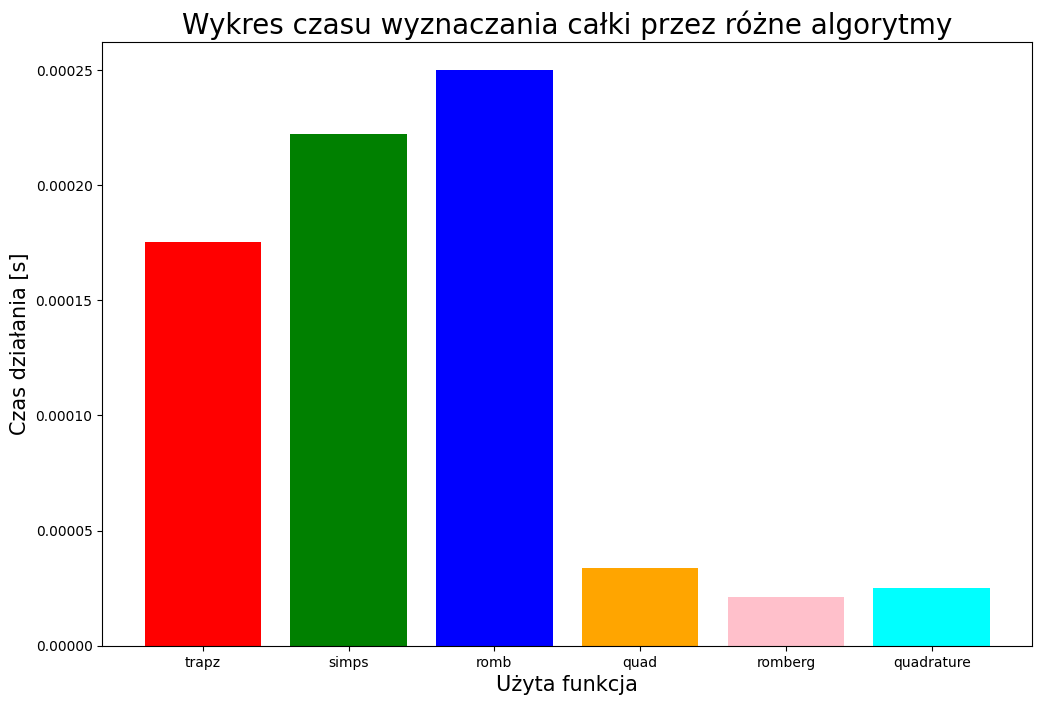

In [169]:
plt.figure(figsize=(12,8),dpi=100)
plt.bar(string_vector,time_vector,color=color_vector)
plt.title('Wykres czasu wyznaczania całki przez różne algorytmy',fontsize=20)
plt.xlabel('Użyta funkcja',fontsize=15)
plt.ylabel('Czas działania [s]',fontsize=15)
plt.show()

Jak można się było spodziewać, w porównaniu czasu wykonywania obliczeń, wszystkie trzy funkcje trapz, simps i romb, przyjmujące za argumenty wektory, charakteryzuje dużo dłuższy czas działania niż w przypadku funkcji quad, romberg i quadrature.

***Zadanie 2.***  
Dla funkcji 

$$f(x) = e^{x^2}$$

wyznacz numerycznie wartośc całki na przedziale $a = 0$, $b=1$  w  taki sam sposób jak w zadaniu 1.

***Wykresy obliczonej całki w zależności od długości wektora y, x i wartości parametru dx:***

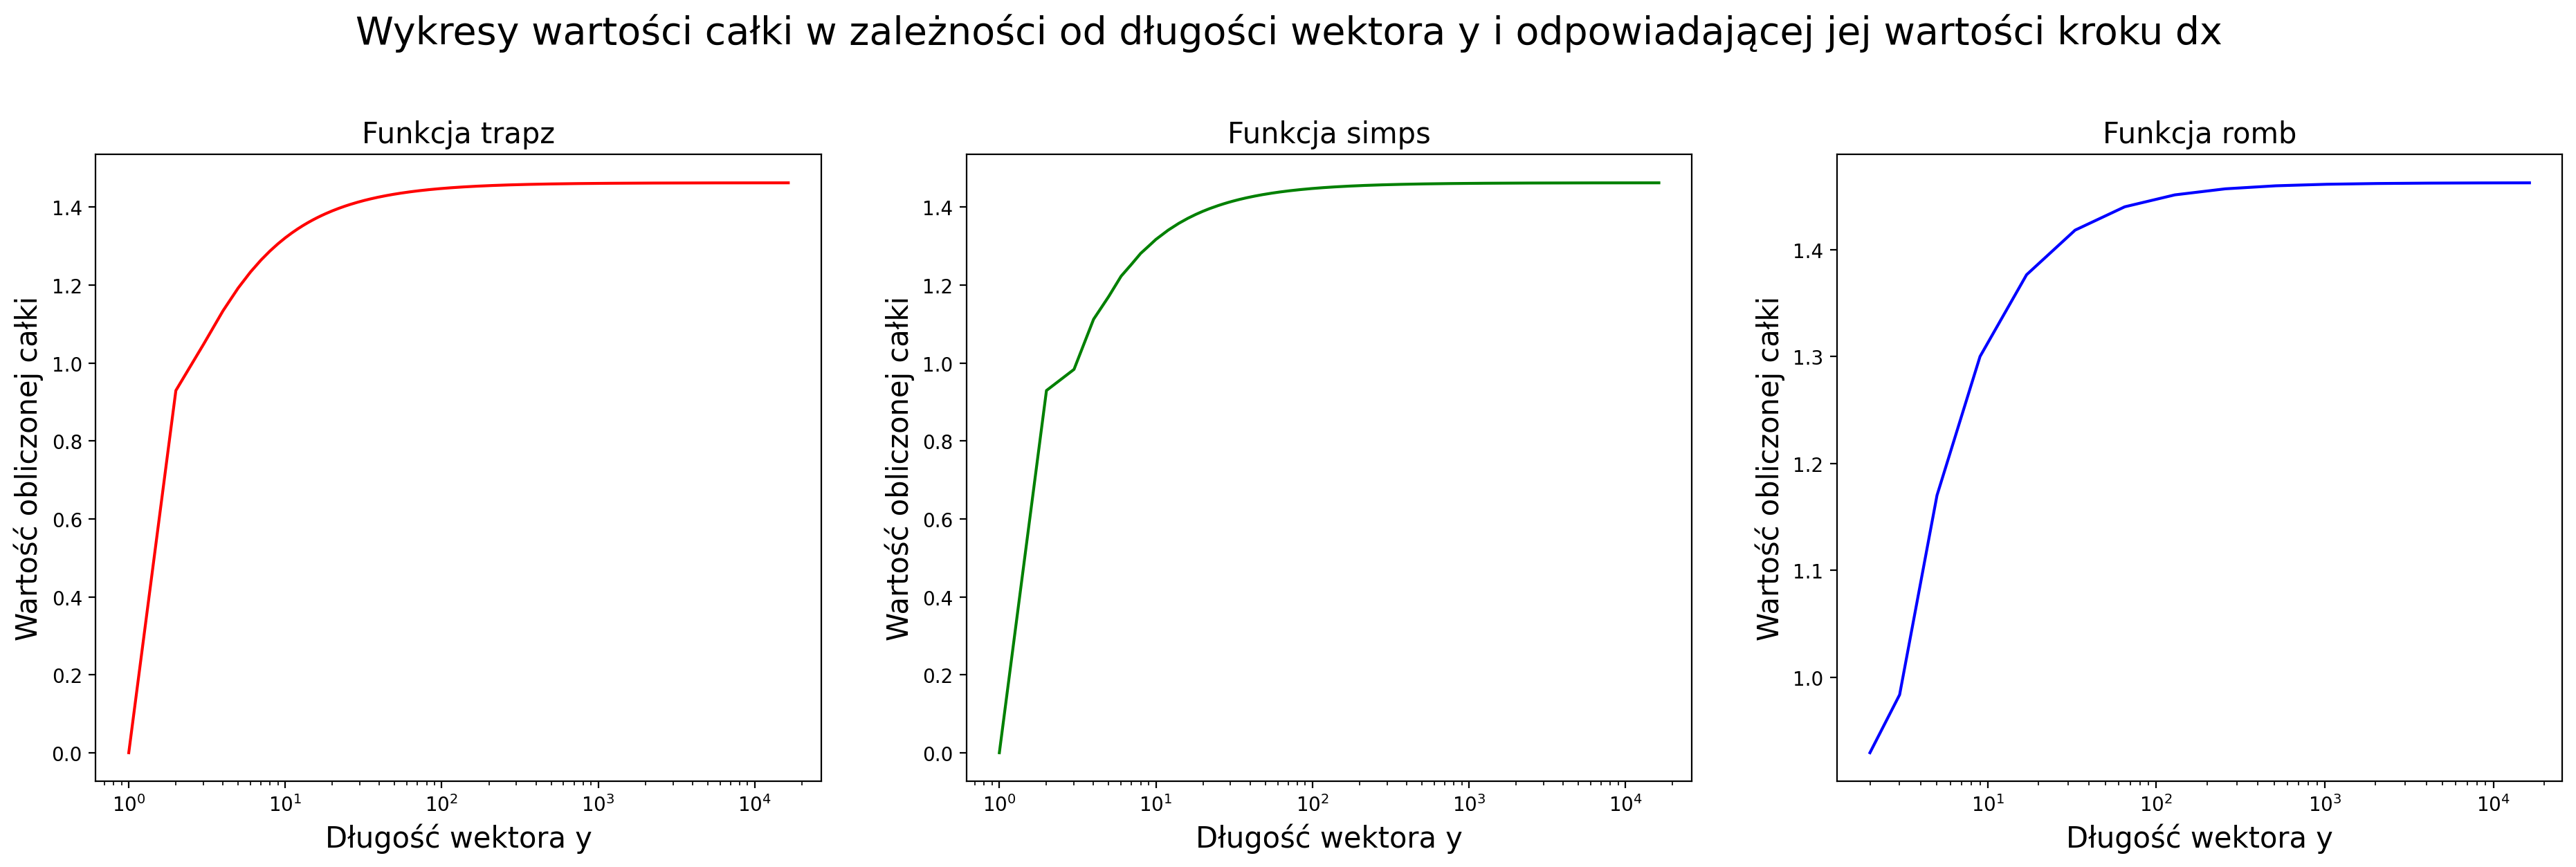

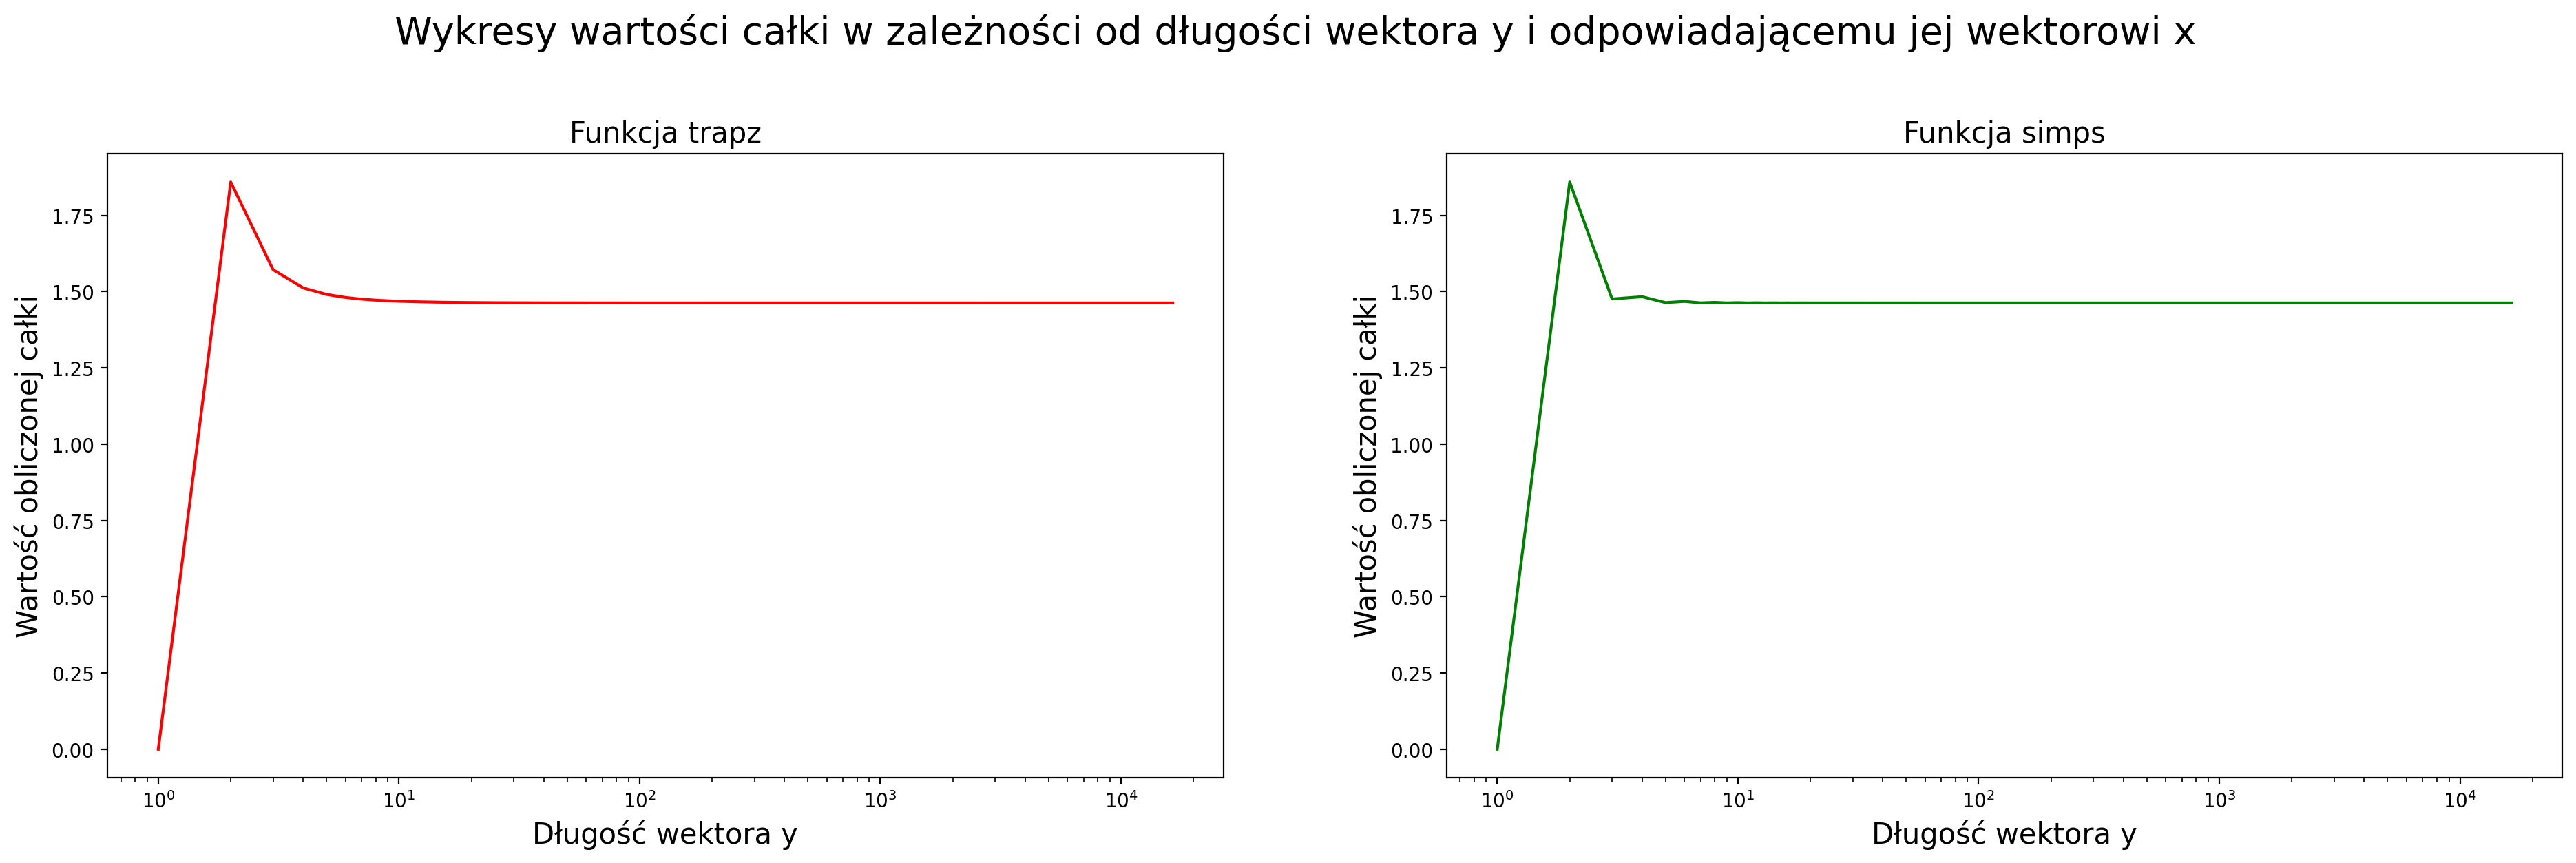

In [170]:
f = lambda x: np.e**(x**2)
len_of_y = np.arange(1, 16386, 1)
k = np.arange(0, 15, 1)
integral_for_different_dx_trapz = []
integral_for_different_dx_trapz_with_x_vec = []
integral_for_different_dx_simps = []
integral_for_different_dx_simps_with_x_vec = []
integral_for_different_dx_romb = []
for length in len_of_y:
    x = np.linspace(0, 1, length)
    y = f(x)
    integral_for_different_dx_trapz.append(ig.trapz(y, dx=1 / length))
    integral_for_different_dx_trapz_with_x_vec.append(ig.trapz(y, x))
    integral_for_different_dx_simps.append(ig.simps(y, dx=1 / length))
    integral_for_different_dx_simps_with_x_vec.append(ig.simps(y, x))
for k_it in k:
    y = f(np.linspace(0, 1, (2 ** k_it) + 1))
    integral_for_different_dx_romb.append(ig.romb(y, dx=1 / (2 ** k_it + 1)))
fig, ax = plt.subplots(1, 3, figsize=(23, 6), dpi=200)
fig.suptitle('Wykresy wartości całki w zależności od długości wektora y i odpowiadającej jej wartości kroku dx',
             fontsize=20, y=1.05)
ax[0].plot(len_of_y, integral_for_different_dx_trapz,color='red')
ax[0].set_xscale('log')
ax[0].set_title('Funkcja trapz', fontsize=15)
ax[0].set_xlabel('Długość wektora y', fontsize=15)
ax[0].set_ylabel('Wartość obliczonej całki', fontsize=15)
ax[1].plot(len_of_y, integral_for_different_dx_simps,color='green')
ax[1].set_xscale('log')
ax[1].set_title('Funkcja simps', fontsize=15)
ax[1].set_xlabel('Długość wektora y', fontsize=15)
ax[1].set_ylabel('Wartość obliczonej całki', fontsize=15)
ax[2].plot(2 ** k + 1, integral_for_different_dx_romb,color='blue')
ax[2].set_xscale('log')
ax[2].set_title('Funkcja romb', fontsize=15)
ax[2].set_xlabel('Długość wektora y', fontsize=15)
ax[2].set_ylabel('Wartość obliczonej całki', fontsize=15)
plt.show()
fig, ax = plt.subplots(1, 2, figsize=(23, 6), dpi=200)
fig.suptitle('Wykresy wartości całki w zależności od długości wektora y i odpowiadającemu jej wektorowi x', fontsize=20,
             y=1.05)
ax[0].plot(len_of_y, integral_for_different_dx_trapz_with_x_vec,color='red')
ax[0].set_xscale('log')
ax[0].set_title('Funkcja trapz', fontsize=15)
ax[0].set_xlabel('Długość wektora y', fontsize=15)
ax[0].set_ylabel('Wartość obliczonej całki', fontsize=15)
ax[1].plot(len_of_y, integral_for_different_dx_simps_with_x_vec,color='green')
ax[1].set_xscale('log')
ax[1].set_title('Funkcja simps', fontsize=15)
ax[1].set_xlabel('Długość wektora y', fontsize=15)
ax[1].set_ylabel('Wartość obliczonej całki', fontsize=15)
plt.show()

Dla innej funkcji f sytuacja ma się bardzo podobnie jak w zadaniu pierwszym. Co jednak ciekawe, można tym razem zaobserwować, że w przypadku innej funkcji i wywołania metod trapz i simps na wektorach, algorytm już nie zawsze dąży do właściwego rozwiązania począwszy od niższych wartości.

***Porównanie błędu metod względem rozwiązania wyznaczonego w sposób analityczny przy pomocy programu WolframAlpha:***
Do metod przyjmujących za argumenty wektory przyjęto wektory o długości 16 385 elementów.

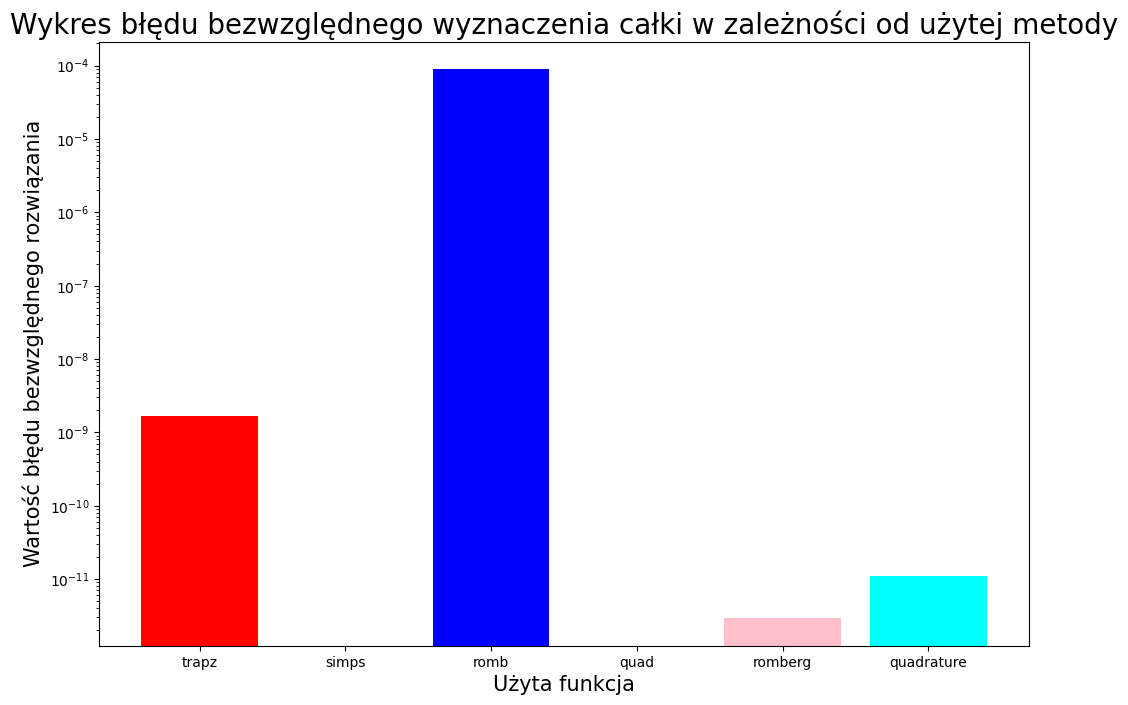

In [171]:
solution = np.sqrt(np.pi)*scipy.special.erfi(1)/2
x = np.linspace(0, 1, 2**14+1)
trapz = ig.trapz(f(x), x)
simps = ig.simps(f(x), x)
romb = ig.romb(f(x), dx=1/(2**14+1))
quad, quad_err = ig.quad(f, 0, 1)
romberg = ig.romberg(f, 0, 1)
quadrature, q_err = ig.quadrature(f, 0, 1)
error_vector = [np.abs(solution-trapz), np.abs(solution-simps), np.abs(solution-romb), np.abs(solution-quad), np.abs(solution-romberg), np.abs(solution-quadrature)]
string_vector = ['trapz', 'simps', 'romb', 'quad', 'romberg', 'quadrature']
plt.figure(figsize=(12,8),dpi=100)
plt.bar(string_vector,error_vector,color=color_vector)
plt.yscale('log')
plt.title('Wykres błędu bezwzględnego wyznaczenia całki w zależności od użytej metody',fontsize=20)
plt.xlabel('Użyta funkcja',fontsize=15)
plt.ylabel('Wartość błędu bezwzględnego rozwiązania',fontsize=15)
plt.show()

Sytuacja również ma się bardzo podobnie do zadania pierwszego. Tak jak poprzednio najlepiej radzą sobie trzy ostatnie algorytmy, jednak tym razem funkcja simps daje wynik z bardzo dużą dokładnością, a metoda trapezów już nie aż tak dobrze jak ostatnio przybliża szukaną całkę. Funkcja romb znowu jake najgorsze rezultaty.